# Exercice 7 - Geometric transformations and landmark based registration

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl

## Geometric transformations on images
The first topic is how to apply geometric transformations on images.
Let us start by defining a utility function, that can show two images side-by-side:

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4), sharex=True, sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

### Image rotation
One of the most useful and simple geometric transformation is rotation, where an image is rotated arounf a point.

We start by some experiments on the image called NusaPenida.png. It can be found in the exercise material.

#### Exercise 1
Read the NusaPenida.png image and call it im_org. It can be rotated by:

In [3]:
in_dir = 'data/'
im_name = "NusaPenida.png"
im_org = io.imread(in_dir+im_name)

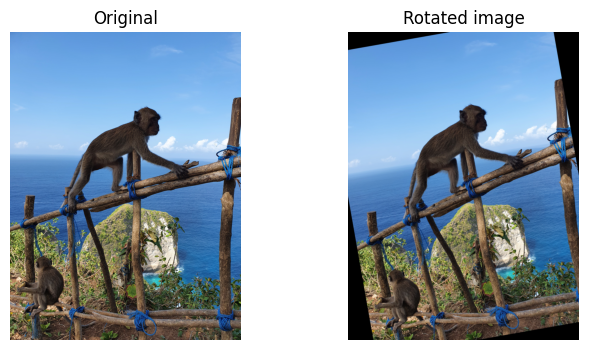

In [4]:
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

Notice, that in this function, the angle should be given in degrees.

By default, the image is rotated around the center of the image. This can be changed by manually specifying the point that the image should be rotated arounde (here:(0,0)):

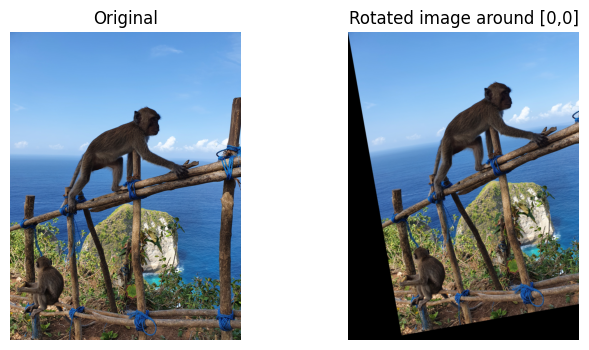

In [5]:
rot_center = [0,0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image around [0,0]")

#### Exercise 2
Experiment whit different center points and notice the results. 

As seen, there are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave. 

Here the background filling mode is set to reflect

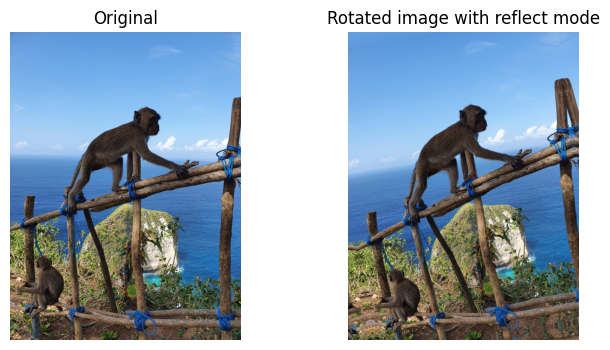

In [6]:
rotated_img_refl = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img_refl, "Rotated image with reflect mode")

### Exercise 3
Try the rotation with background filling mode reflect an wrap and notice the results and differences.

It is also possible to define a constant fill value. Currently, sci-kit image only supporst a single value (not RGB).

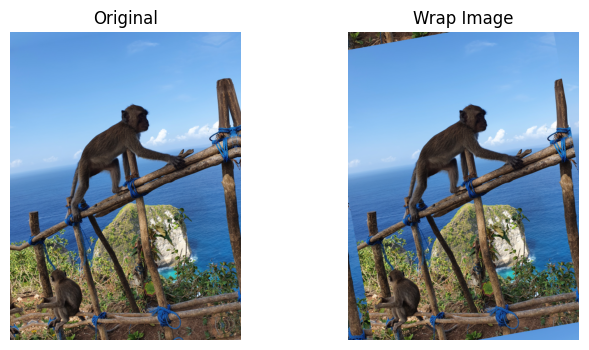

In [7]:
rotated_img_wrap = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(rotated_img_refl, rotated_img_wrap, 'Wrap Image')

### Exercise 4
Try to use:

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 1)

with different values of cval and notices the outcomes.

By default, the rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

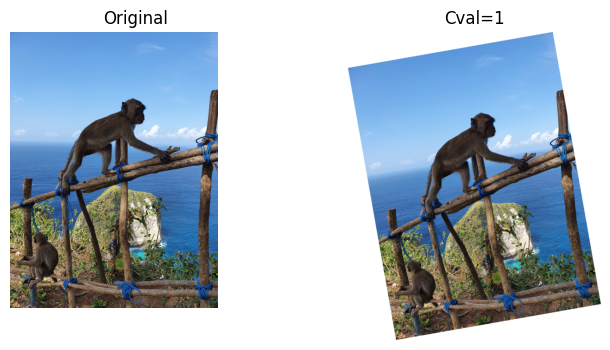

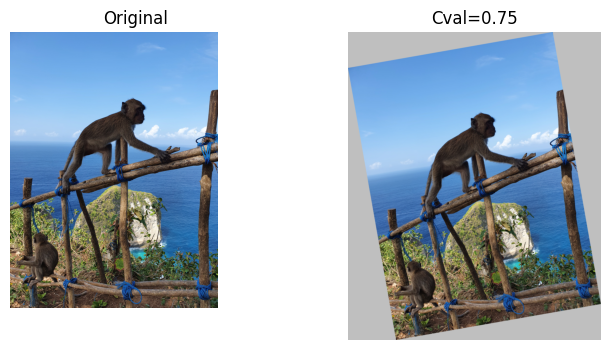

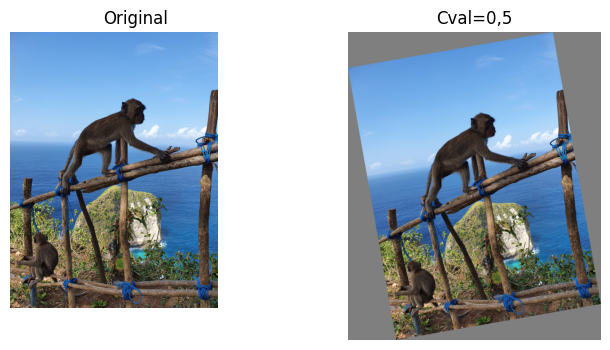

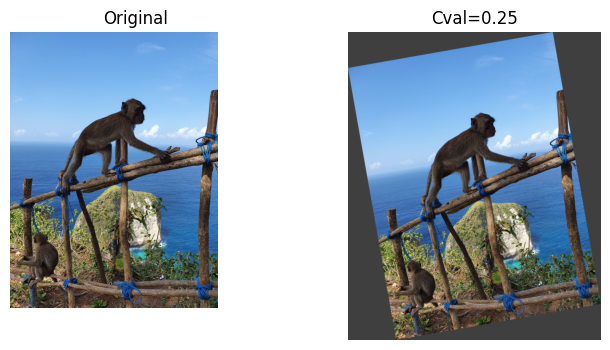

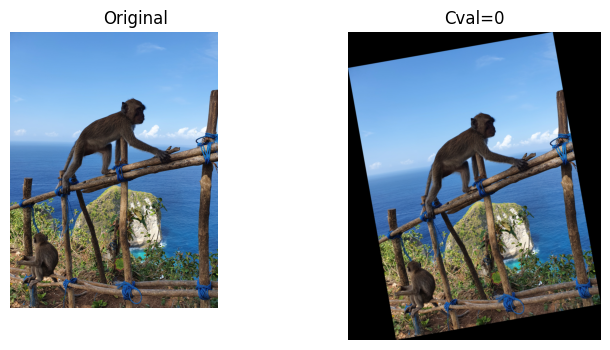

In [10]:
rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 1)
show_comparison(im_org, rotated_img, 'Cval=1')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.75)
show_comparison(im_org, rotated_img, 'Cval=0.75')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.5)
show_comparison(im_org, rotated_img, 'Cval=0,5')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0.25)
show_comparison(im_org, rotated_img, 'Cval=0.25')

rotated_img = rotate(im_org, rotation_angle, resize = True, mode="constant", cval = 0)
show_comparison(im_org, rotated_img, 'Cval=0')

### Exercise 5
Test the use of automatic resizing:

In [ ]:
rotated_img = rotate(im_org, rotation_angle, resize=True)

also combine resizing with different background filling modes.

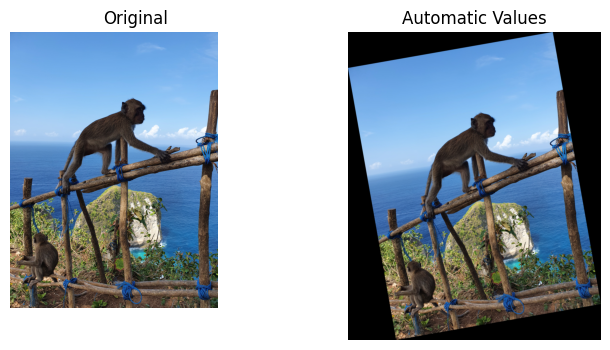

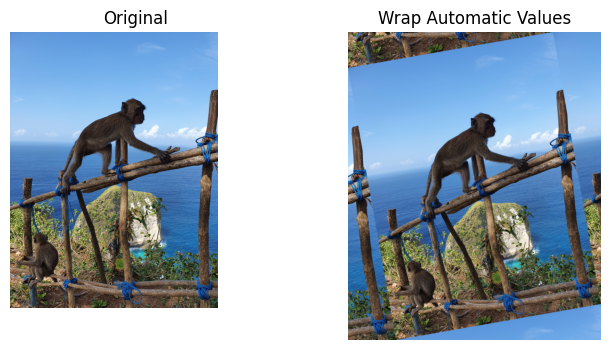

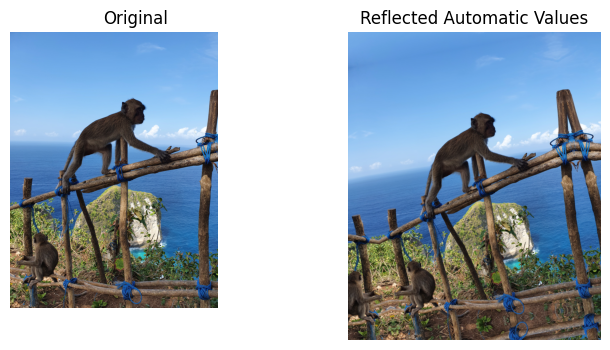

In [14]:
rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, 'Automatic Values')

rotated_img = rotate(im_org, rotation_angle, resize=True, mode='wrap')
show_comparison(im_org, rotated_img, 'Wrap Automatic Values')

rotated_img = rotate(im_org, rotation_angle, resize=True, mode='reflect')
show_comparison(im_org, rotated_img, 'Reflected Automatic Values')

## Euclidean image transformation

An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the __Euclidean__ image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.

### Exercise 6
Start by definig the transformation:

In [15]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi /180.
trans = [10,20]
tform = EuclideanTransform(rotation=rotation_angle, translation= trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


it can be seen in the print statement that the transformation consists of a 3x3 matrix. The matrix is used to transform points using __homogenous coordinates__. Notice that the angle is defined in radians in this function. 

### Exercise 7
The computed transform can be applied to an image using the warp function:

In [ ]:
transformed_img = warp(im_org, tform)